[View in Colaboratory](https://colab.research.google.com/github/boosuro/identifying_handwritten_digits_with_tensorflow_nn/blob/master/neural_network_to_determine_handwritten_digits.ipynb)

**Building a neural network to identify hand written digits using MNIST database**


### Import  MNIST Data using TensorFlow

In [0]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [47]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


 ** check type ofmnist**
 

In [48]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

** array of train image**

In [49]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**check number of images for Training,Testing and Validation**




In [50]:
mnist.train.num_examples

55000

In [51]:
mnist.test.num_examples

10000

In [52]:
mnist.validation.num_examples 

5000

**  Visualizing the Data**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
mnist.train.images[1].shape

(784,)

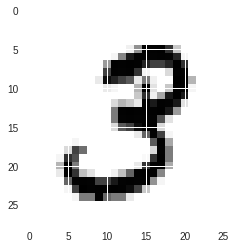

In [55]:
plt.imshow(mnist.train.images[1].reshape(28,28))

**Maximum and Minimum value of the pixels in the image**

In [56]:
mnist.train.images[1].max()

1.0

**Creating tensorflow  model**

In [0]:
x =tf.placeholder(tf.float32,shape=[None,784])

In [0]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [0]:
b = tf.Variable(tf.zeros([10]))

In [0]:
# Create the Graph
y = tf.matmul(x,W) + b

In [0]:
# Loss and Optimizer
y_true = tf.placeholder(tf.float32,[None,10])

In [0]:
# cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
# create the session
init = tf.global_variables_initializer()

In [68]:
with tf.Session() as sess:
  sess.run(init)
  
  # Train the model for 1000 step on the training set using built in batch feeder from mnist
  
  for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
  # evaluating the trained model on test data
  matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  acc = tf.reduce_mean(tf.cast(matches,tf.float32))
  print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9202
